# Lab 3.4: Jointly Distributed Random Variables

## Outline
- Covariance
- Correlation 
- Independence
- Joint probability distribution
- Marginal probability distribution
- Conditional probability distribution

## Covariance

Covariance measures how much 2 random variables change together:
- **Covariance is positive when **
  - `random variable 1` has a high value when `random variable 2` has a high value
  - `random variable 1` has a low value when `random variable 2` has a low value

<br>

- **Covariance is negative when **
  - `random variable 1` has a low value when `random variable 2` has a high value, and vice versa

<br>

- **Covariance is 0 when **
  - `random variable 1` and `random variable 2` do not have any linear relationship


- Here is the case when covariance is positive

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

cov(x1, x2)

array([[ 666.66666667,   79.        ],
       [  79.        ,   30.33583333]])

By default, `numpy` returns a covariance matrix, and it has the following form

\begin{bmatrix}
    var(x1) & cov(x1, x2) \\
    cov(x1, x2) & var(x2)
\end{bmatrix}

So the covariance between `x1` and `x2` is 79

- Here is the case when covariance is negative

In [3]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the covariance between x1 and x2
# Your code here

cov(x2,x2)

array([[ 30.33583333,  30.33583333],
       [ 30.33583333,  30.33583333]])

- Here is the case when covariance is 0

In [4]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the covariance between x1 and x2
# Your code here

## Correlation

Correlation is convariance normalized by the standard deviations of the variables.

Therefore, the same rules of covariance apply to correlation, except correlation is bounded between -1 and 1.

Correlation provides a scaled measure of covariance so we can compare correlation across different datasets.

- Here is the case when correlation is positive

In [5]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

corrcoef(x1, x2)

array([[ 1.        ,  0.55551368],
       [ 0.55551368,  1.        ]])

Again `numpy` returns a correlation matrix, and it has the following form:

\begin{bmatrix}
    corr(x1, x1) & corr(x1, x2) \\
    corr(x2, x1) & corr(x2, x2)
\end{bmatrix}

The correlation of a variable with itself, i.e. $corr(x1, x1)$, is always 1.

- Here is the case when correlation is negative

In [5]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the correlation between x1 and x2
# Your code here

corrcoef(x1,x2)

array([[ 1.        , -0.55551368],
       [-0.55551368,  1.        ]])

- Here is the case when correlation is zero / undefined

In [6]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the correlation between x1 and x2
# Your code here

corrcoef(x1,x2)

array([[ 1.,  0.],
       [ 0.,  1.]])

## Independence


### Continuous Random Variables

If two random variables are correlated, then they are dependent.

**However if two random variables are not correlated, it does not mean they are independent.**

**Correlation describes linear dependencies between random variables, dependency can be described by other types of relationships**

- The example below demonstrates the idea

corr(x1, x2): 0.0


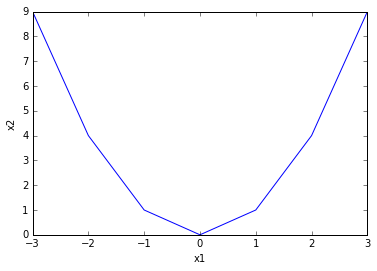

In [7]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

print('corr(x1, x2):', corrcoef(x1, x2)[0,1])

plot(x1, x2)
xlabel('x1')
ylabel('x2');

$x_1$ and $x_2$ are clearly dependent, but since the relationship is perfectly quadratic, the correlation is 0.

### Discrete Random Variables


**Independence can be estalished by:**

$$p(x, y) = p(x) \times p(y)$$

Say we want to find out if being in Class A or Class B affects one chances of going to college and the data is given below.

|   | Success | Fail |
|---|---------|------|
| A | 20      | 34   |
| B | 15      | 12   |

In [8]:
total = ((20 + 34) + (15 + 12))
p_a = (20 + 34) / total
p_success = (20 + 15) / total
p_a_and_success = 20 / total
print('p(a) * p(success):', p_a * p_success)
print('p(a and success):', p_a_and_success)

p(a) * p(success): 0.28806584362139914
p(a and success): 0.24691358024691357


**Question**: Is getting into college independent of the two classes?

No.

The probability of getting into college is not independent of the two classes. If two varaibles are independent than $P(A and B) = P(A)*P(B)$

$Since, P(A and Success) = 28.8% and P(A) * P(Success) = 24.7% these are not independent.$




## Joint / marginal / conditional probability distribution

Joint / marginal / conditional distributions are useful for comparing **trends across different groups** in a dataset. 

Here we illustate how to use these techniques to conduct a **market segmentation analysis**.

- First we read in the data

In [9]:
import pandas as pd

pd.set_option('display.precision', 3)

sales_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/gender_product_segmentation.csv', 
                         index_col=0)
sales_data

,Product 1,Product 2,Product 3,Product 4
Male,321,857,404,766
Female,65,471,443,192


-  We get the sum of the rows and sum of the columns

In [16]:
col_sum = sales_data.sum(axis=0)
row_sum = sales_data.sum(axis=1)
total_sum = sum(sales_data.sum(axis=0))

# Write one line of code to compute the row sums here


print('----- Row sums ----')
print(row_sum)
print() 
print('----- Col sums -----')
print(col_sum)
print() 
print('----- Total sum ----')
print(total_sum)

----- Row sums ----
Male      2348
Female    1171
dtype: int64

----- Col sums -----
Product 1     386
Product 2    1328
Product 3     847
Product 4     958
dtype: int64

----- Total sum ----
3519


## Joint probabilities

- To compute the joint probability, we divide each cell by the `total_sum`

In [23]:
# Compute the joint probability and name is 'sales_joint'
# sales_joint should have the same dimension as the original data table


sales_joint=sales_data/total_sum
print(sum(sales_joint.sum()))
sales_joint

1.0


,Product 1,Product 2,Product 3,Product 4
Male,0.091,0.244,0.115,0.218
Female,0.018,0.134,0.126,0.055


- To be explicit, the joint probabilities are:

$$P(\text{Product 1} \cap \text{Male}) = 0.09$$
$$P(\text{Product 2} \cap \text{Male}) = 0.24$$
$$P(\text{Product 3} \cap \text{Male}) = 0.11$$
$$P(\text{Product 4} \cap \text{Male}) = 0.22$$


$$P(\text{Product 1} \cap \text{Female}) = 0.02$$
$$P(\text{Product 2} \cap \text{Female}) = 0.13$$
$$P(\text{Product 3} \cap \text{Female}) = 0.13$$
$$P(\text{Product 4} \cap \text{Female}) = 0.05$$

- Now let's visualize the joint probability distribution

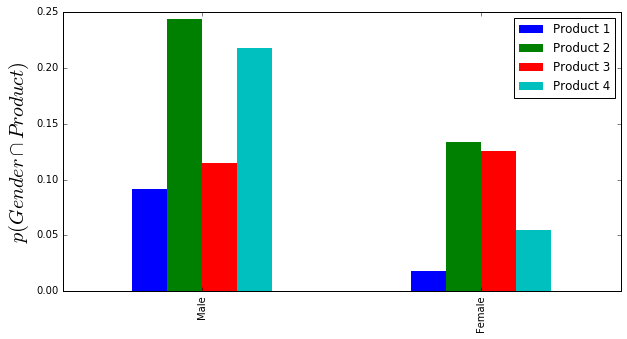

In [24]:
sales_joint.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Gender \cap Product)$', fontsize=20);

Just by looking at the joint probability alone, it is tempting to conclude:
- Male buyers prefer **Product 2, 4**
- Female buyers prefer **Product 2, 3**

Let's also look at the marginal probabilities as well.

## Marginal Probabilities

A marginal probability is the sum of joint probabilities over the category of interest.

Say we are interested in gender, the marginal probabilities here would be (`row sum / total sum`)

In [27]:
# Compute and print the marginal probabilities for gender
marginal_gender_prob =sales_data.sum(axis=1)/total_sum
marginal_gender_prob

Male      0.667
Female    0.333
dtype: float64

There are twice as much male buyers compared to female buyers

Since we are dividing each cell with the total count when we are calculating joint probabilities, we are not taking into account the skewed distribution of buyers of different genders

**We need to take into account the fact that there are more male buyers**, and we turn to conditional probabilities for that.

## Conditional Probabilities

Conditional probability is computed by considering each group of interest individually.

We could look at female buyers as if there are no male buyers and only examine the female buyers' behavior. 

And the same applies to male buyers.

To compute a conditional probability, we divide the row by the row sum of that corresponding row.

In [262]:
male_sum = row_sum[0]
female_sum = row_sum[1]

sales_data_conditional = sales_data.copy()
sales_data_conditional.ix['Male'] = sales_data.ix['Male'] / male_sum
sales_data_conditional.ix['Female'] = sales_data.ix['Female'] / female_sum
# Compute the conditional distribution of buyers' behavior for female buyers

sales_data_conditional

,Product 1,Product 2,Product 3,Product 4
Male,0.121,0.323,0.152,0.289
Female,0.024,0.173,0.163,0.071


- Now let's visualize the conditional probability distribution

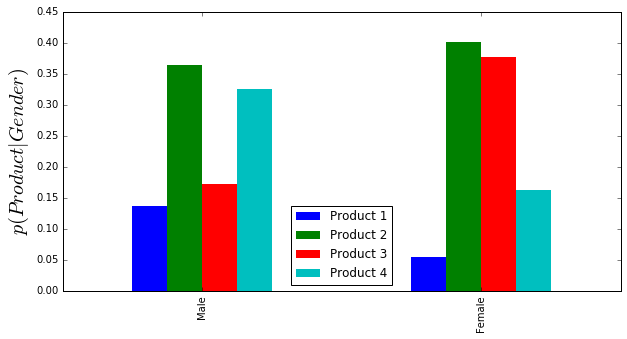

In [30]:
sales_data_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Product | Gender)$', fontsize=20);

Now we are treating female and male buyers equally regardless of the number of buyer for each gender

We can conclude:
- Male buyers prefer **Product 2,4**
- Female buyers prefer **Product 2,3**

## Exercises

**Question 1**
- Read in the file https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv and complete the following tasks:
   - Implement a function to calculate covariance (does not need to be in matrix form)
   - Implement a function to calcualte correlation (does not need to be in matrix form)
   - Identify the variable that is the most correlated with `gpa`

In [31]:
import pandas as pd

In [45]:
inc_gpa_df.head()

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62
4,50952.0,3.10,45


In [106]:
inc_gpa_df= pd.read_csv( 'https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv')

number_of_observations = inc_gpa_df.family_income.count()

mean_family_income = inc_gpa_df.family_income.mean()
mean_gpa = inc_gpa_df.gpa.mean()
mean_parent_avg_age = inc_gpa_df.parent_avg_age.mean()




In [87]:
#covariance function
import math

def co_var(variable1,variable2):
    """calculate cov"""
    var1_mean = variable1.mean()
    var2_mean = variable2.mean()
    
    observations = variable1.count()
    counter = 0
    Cov = 0
    
    while counter < observations:
        Cov+=((variable1[counter]-var1_mean)*(variable2[counter]-var2_mean))
        
        counter +=1
        
    return Cov / observations
        
    
    
    

In [74]:
co_var(inc_gpa_df.family_income,inc_gpa_df.parent_avg_age)

-1226.2147143883528

In [61]:
cov(inc_gpa_df.family_income,inc_gpa_df.parent_avg_age)
#IT WORKS!


-1226.2147143883528

In [71]:
math.sqrt(10)

3.1622776601683795

In [88]:
def correlation(var1,var2):
    cov_var1_var2 = co_var(var1,var2)
    variance1 =math.sqrt(co_var(var1,var1))
    variance2 =math.sqrt(co_var(var2,var2))
    return cov_var1_var2 / (variance1*variance2 )
    

In [89]:
correlation(inc_gpa_df.parent_avg_age,inc_gpa_df.gpa)

-0.0091348539645125012

In [84]:
corrcoef(inc_gpa_df.parent_avg_age,inc_gpa_df.gpa)

array([[ 1.        , -0.00913485],
       [-0.00913485,  1.        ]])

In [85]:
corrcoef(inc_gpa_df.family_income,inc_gpa_df.gpa)

array([[ 1.        ,  0.74226939],
       [ 0.74226939,  1.        ]])

## The variable most correlation with GPA is family income (.74 for family income vs GPA vs -.009 correlation for avg age vs gpa)

**Question 2**
- Is `gpa` independent of the `family_income`? Why or why not?

In [107]:
inc_gpa_df.head()

,family_income,gpa,parent_avg_age
0,31402.0,3.18,32
1,32247.0,2.98,48
2,34732.0,2.85,61
3,53759.0,3.39,62
4,50952.0,3.10,45


In [111]:
correlation(inc_gpa_df.family_income,inc_gpa_df.gpa)

0.74226939020384908

Since the correlation is not 0, we can conclude that these variables (gpa and family_income) are dependent.

**Question 3**
- By categorizing the `gpa` into low/medium/high and `family_income` into `low/medium/high` (choose cut-off values that make sense to you), compute the conditional probability distributions and conduct analysis about how `family_income` affects `gpa`.

In [233]:
inc_gpa_df.describe()

,family_income,gpa,parent_avg_age
count,10992.000,10992.000,10992.000
mean,40191.637,2.998,47.812
std,18246.672,0.296,10.629
min,168.000,2.010,30.000
25%,26832.750,2.800,39.000
50%,37510.000,2.990,48.000
75%,51112.250,3.200,57.000
max,125508.000,3.970,66.000


Below the first quartile we will define as the low family_income, between the first quartile and third quartile we will define as middle family_income, and above the third quartile we will define as high family_income. We will follow this same procedure for GPA.

In [278]:
inc_gpa_df_conditional = inc_gpa_df.copy()
#print(inc_gpa_df_conditional)
inc_gpa_df_conditional.family_income[inc_gpa_df_conditional.family_income<=26832.750]='low_income'




inc_gpa_df_conditional.family_income[ (inc_gpa_df.family_income>26832.750) & (inc_gpa_df.family_income<51112.250).any()]='middle_income'

inc_gpa_df_conditional.family_income[inc_gpa_df.family_income>=51112.250]='high_income'

#inc_gpa_df_conditional.family_income

inc_gpa_df_conditional.gpa[inc_gpa_df.gpa<=2.800]='low_gpa'
inc_gpa_df_conditional.gpa[(inc_gpa_df.gpa>2.800) & (inc_gpa_df.gpa<3.200).any()]='middle_gpa'
inc_gpa_df_conditional.gpa[inc_gpa_df.gpa>=3.2]='high_gpa'

#inc_gpa_df_conditional.head()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [304]:
cross_income_gpa = pd.crosstab(inc_gpa_df_conditional.family_income,inc_gpa_df_conditional.gpa)
cross_income_gpa 

gpa,high_gpa,low_gpa,middle_gpa
family_income,,,
high_income,1658,0,1090
low_income,15,1795,938
middle_income,1106,1045,3345


In [312]:
##conditional probabilities for 

cross_income_conditional = cross_income_gpa.copy()

row_s = cross_income_conditional.sum(axis=1)
high_income_sum = row_s[0]
low_income_sum = row_s[1]
middle_income_sum = row_s[2]

# cross_income_conditional.ix['high_income']



# high_income_sum = cross_income_gpa.sum()
# middle_income_sum = cross_income_gpa.middle_income.sum()
# low_income_sum = cross_income_gpa.low_income.sum()



# print(cross_income_conditional)
cross_income_conditional.ix['high_income'] = cross_income_conditional.ix['high_income']/high_income_sum
# print(cross_income_conditional.ix['high_income'])

cross_income_conditional.ix['middle_income'] = cross_income_conditional.ix['middle_income']/middle_income_sum
cross_income_conditional.ix['low_income'] = cross_income_conditional.ix['low_income']/low_income_sum


#cross_income_conditional

In [313]:
cross_income_conditional

gpa,high_gpa,low_gpa,middle_gpa
family_income,,,
high_income,0.603,0.000,0.397
low_income,0.005,0.653,0.341
middle_income,0.201,0.190,0.609


In [314]:
import seaborn as sns

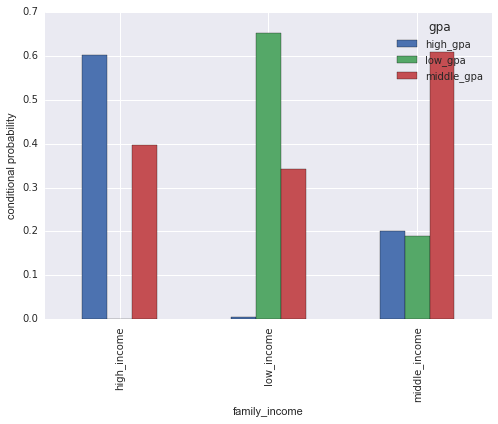

In [319]:
cross_income_conditional.plot(kind='bar')
plt.ylabel('conditional probability')